# Mi cuarto notebook

## Python 2 IV

#### (Esta es la última versión de este tutorial y se recomienda utilizar el de Python 3.x)

> Ricardo Méndez Fragoso $\mathbb{R} i \vec c \hbar$

Podemos utilizar las librerías para realizar diferentes representaciones de fenómenos. Por ejemplo, podemos representar campos vectoriales, potenciales escalares, animaciones, librerías, etc. En este *notebook* se muestran algunos ejemplos de los anteriores. El objetivo de este último notebook es terminar de proporcionar las herramientas básicas para realizar más *notebooks*. En la página de *notebook’s*  se pueden encontrar unidades de aprendizaje con ejemplos más específicos en los que se haces simulaciones representativas de distintos fenómenos. Para comenzar llamaremos a las siguientes bibliotecas:

In [1]:
# se importan la librerias necesarias
from pylab import *
from scipy.integrate import *
from mpl_toolkits.mplot3d import Axes3D # modulo para graficar en 3 dimensiones
from matplotlib import cm
%matplotlib inline

## Gráfica en 3D (Trayectoria).

Comencemos graficando la trayectoria de una partícula en tres dimensiones. Por ejemplo, supongamos que queremos lanzar una pelota sobre el plano $xy$. Incluso podemos pedir que el movimiento tenga fricción proporcional a la velocidad. De esta manera las ecuaciones de movimiento son:

$$
\begin{align}
\ddot x = & - \gamma v_x \\
\ddot y = & - \gamma v_y \\
\ddot z = & -g - \gamma v_z
\end{align}
$$

donde $g$ es la aceleración de la gravedad cerca de la Tierra y $\gamma$ es el factor de amortiguación que depende de las dimensiones del objeto, su forma, etc. El sistema de ecuaciones que se debe programar es:
$$
\begin{align}
\dot x  =& v_x & \dot v_x = & - \gamma v_x \\
\dot y  =& v_y &\dot v_y = & - \gamma v_y \\
\dot z  =& v_z &\dot v_z = & -g - \gamma v_z
\end{align}
$$

Estas ecuaciones se pueden programar con la siguiente función:

In [2]:
def tiro(x,t,gamma=0,g=9.8):
    # x contienen a las variables x,y,z,vx,vy,vz
    dx,dy,dz = x[3],x[4],x[5]
    dvx,dvy = -gamma*x[3],-gamma*x[4]
    dvz = -g - gamma*x[5]
    return array([dx,dy,dz,dvx,dvy,dvz])

Con las siguientes instrucciones podemos hacer la gráfica en 3 dimensiones. Note que se ha marcado el punto inicial de la partícula lanzada y se han agregado gráficas en 2D en cada uno de los planos para ver la proyección de la trayectoria en cada uno de ellos.

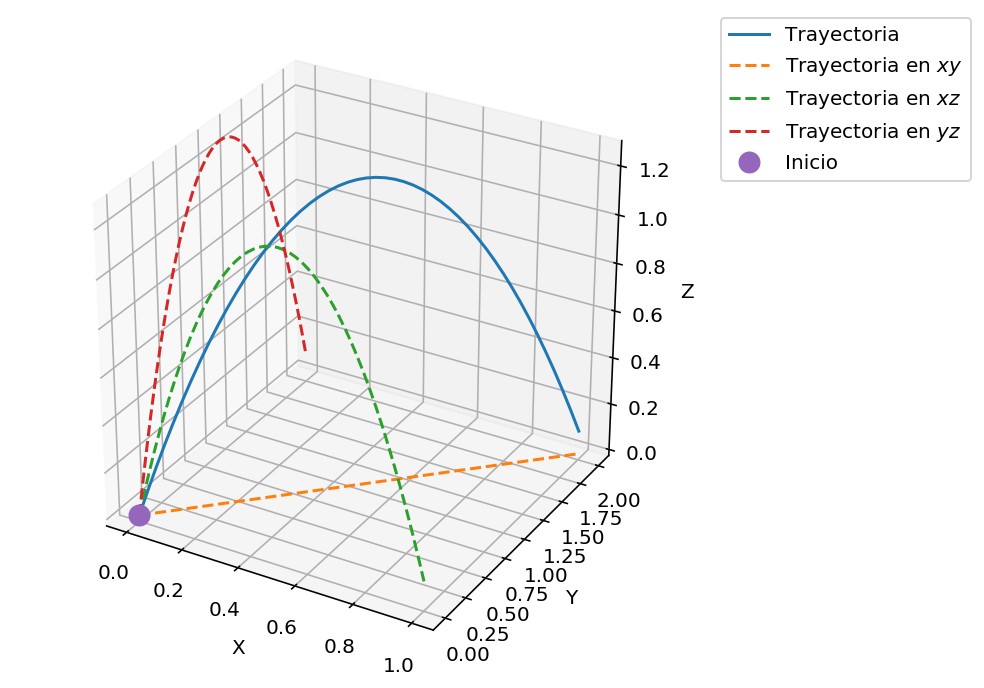

In [3]:
t=linspace(0,1)
cond_ini = [0,0,0,1,2,5]
sol = odeint(tiro,cond_ini,t)
fig = figure(figsize=(6,6))
grafica = fig.add_subplot(111,projection='3d')
plot(sol[:,0],sol[:,1],sol[:,2],label='Trayectoria')
plot(sol[:,0],sol[:,1],zeros(len(t)),'--',label=r'Trayectoria en $xy$')
plot(sol[:,0],zeros(len(t)),sol[:,2],'--',label=r'Trayectoria en $xz$')
plot(zeros(len(t)),sol[:,1],sol[:,2],'--',label=r'Trayectoria en $yz$')
plot([sol[0,0]],[sol[0,1]],[sol[0,2]],'o',label='Inicio',markersize=10)
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
grafica.set_xlabel('X'),grafica.set_ylabel('Y'),grafica.set_zlabel('Z')
show()

> Cabe destacar que en esta caso es necesario generar un ambiente en el que viva la gráfica, y a ésta se le agregan los atributos para realizar el dibujo. Para ello es necesario utilizar la notación con *punto*. Esto se aprecia en las líneas 4 y 5 del la celda anterior.

## Gráfica en 3D (Superficie)

Otras gráficas importantes en 3D son las que representan funciones escalares de varias variables. Tal es el caso de las funciones de potencial eléctrico, gravitacional, etc. Estas funciones toman varias variables y proporcionan un sólo número, $\mathbb{R}^n \to \mathbb{R}$. Ejemplo de esta función podría ser una Gaussiana multiplicada por la función $\sin(x)\cos(y)$ de la siguiente forma:

$$
f(x,y)=e^{-(x^2 + y^2)}\sin x \cos y = e^{- \rho ^2}\sin x \cos y 
$$

donde $\rho ^2 = x^2 + y^2$. Esta función queda definida con la siguiente función:

In [4]:
def campana_mod(x,y):
    return sin(x)*cos(y)*exp(-(x**2 + y**2))

Para hacer la gráfica de esta función primero se tiene que tener un vector con los valores de $x$ y $y$ a evaluar. Con ellos se tiene que hacer una malla con en el que para cada elemento de $x$ se tengan los valores de $y$. Esto se consigue con la función ```meshgrid()```. Con la salida de esta función se hace la evaluación de la función para posteriormente utilizar ```plot_suface()``` para hacer la gráfica.

> Al igual que en caso anterior es necesario generar un ambiente en el cual viva la figura.

Con el siguiente código se puede hacer la gráfica de la función anterior en la región $[-2,2] \times [-2,2]$.

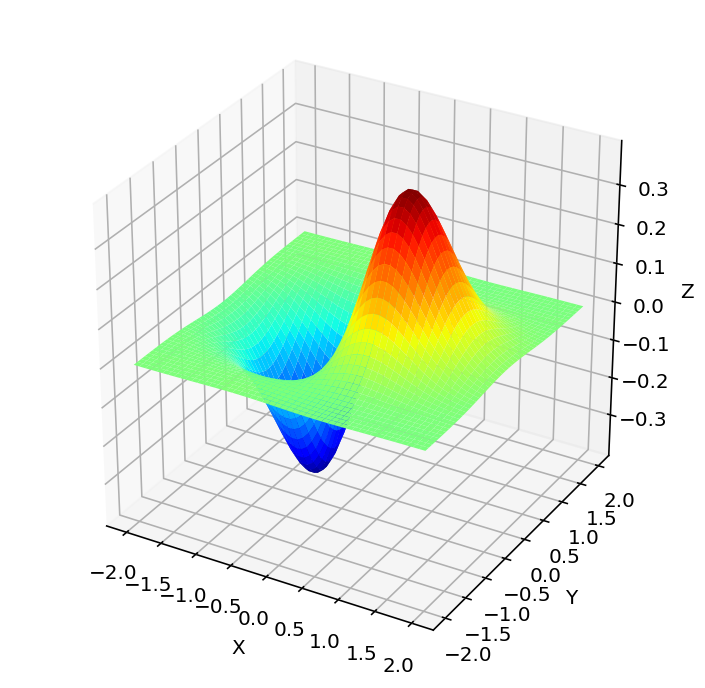

In [5]:
x,y = linspace(-2,2),linspace(-2,2)
x_mesh,y_mesh = meshgrid(x,y)
z = campana_mod(x_mesh,y_mesh)
fig=figure(figsize=(6,6))
grafica = fig.add_subplot(111,projection='3d')
grafica.plot_surface(x_mesh,y_mesh,z,rstride=1,cstride=1,cmap=cm.jet)
grafica.set_xlabel('X'),grafica.set_ylabel('Y'),grafica.set_zlabel('Z')
show()

> En la gráfica anterior, en la función ```plot_surface()``` se han utlizado los parámetros ```rstride=1 ```y ```cstride=1``` para que se dibujen las líneas correspondientes a cada punto de la malla. El argumento ```cmap=cm.jet``` es para que se utilice un mapa de colores en la altura de la función.

Otra forma de hacer la gráfica de esta función es con un código de colores en plano $xy$. Para ello se utiliza la función ```pcolor()``` y un mapa de colores para hacer la distinción en la evaluación de la función. Con el siguiente código se puede hacer la gráfica con colores en 2D.

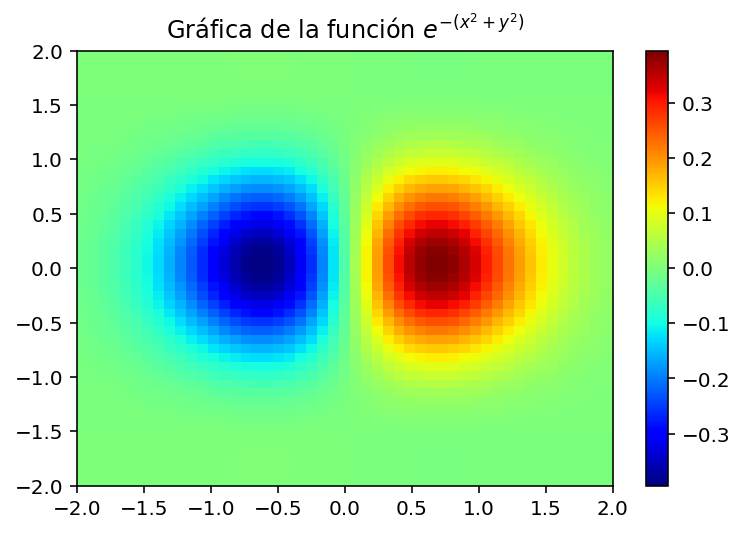

In [6]:
x,y = linspace(-2,2),linspace(-2,2)
x_mesh,y_mesh = meshgrid(x,y)
z = campana_mod(x_mesh,y_mesh)
title(ur'Gráfica de la función $e^{-(x^2+y^2)}$')
pcolor(x_mesh,y_mesh,z,cmap=cm.jet)
colorbar()
show()

Note que se observa que la gráfica de la función aparece *pixelada*. Esto se debe a que en la función anterior depende del número de puntos en $x$ y $y$. Entre más puntos se utilicen los *pixeles* irán desapareciendo. Como complemento, se pueden hacer las curvas de nivel de la función anterior con la función ```contour()``` como se muestra a continuación:

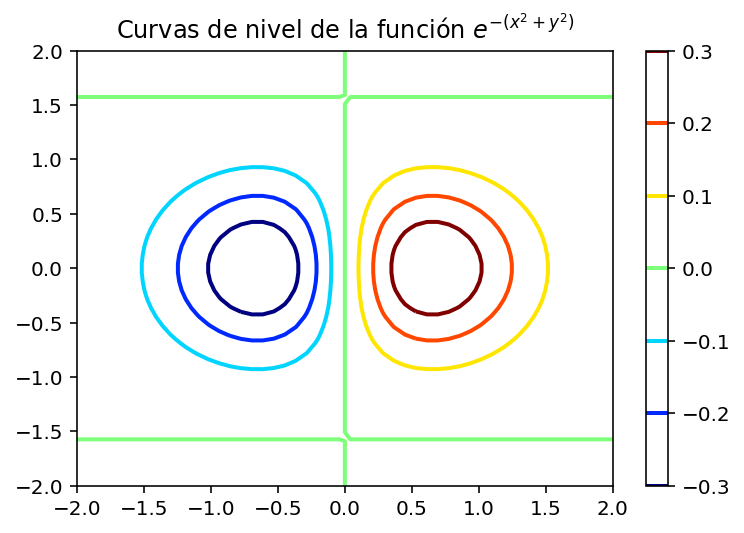

In [7]:
title(ur'Curvas de nivel de la función $e^{-(x^2+y^2)}$')
contour(x_mesh,y_mesh,z,cmap=cm.jet,linewidths=2)
colorbar()
show()

## Campo vectorial

Otra de las funciones que se utiliza con mucha frecuencia en las ciencias es el campo vectorial. Ésta función es de tipo vectorial de dimensión $m$ y a su vez cada una de las componentes contiene una función escalar $\mathbb{R}^n \to \mathbb{R}$. De esta manera se obtiene una función $\mathbb{R}^n \to \mathbb{R}^m$. Esto quiere decir que a cada punto en $\mathbb{R}^n$ le corresponde un vector en $\mathbb{R}^m$.

Continuando con el ejemplo anterior podemos obtener el gradiente de la función $f(x,y)=e^{-(x^2 + y^2)}\sin x \cos y = e^{- \rho ^2}\sin x \cos y $ en los párrafos anteriores para obtener una función $\mathbb{R}^2 \to \mathbb{R}^2$:
$$
\vec F = \nabla f = e^{-(x^2 + y^2)} \left( -2x \sin x  + \cos x \right)\cos y \hat i + e^{-(x^2 + y^2)} \left( -2y \cos y  - \sin y \right)\sin x \hat j
$$

Esta función se puede programar de la siguiente manera:

In [8]:
def campo_campana_mod(x,y):
    r2 = x**2 + y**2
    fx = (-2.*x*sin(x) + cos(x))*cos(y)*exp(-(r2))
    fy = sin(x)*(-2*y*cos(y) - sin(y))*exp(-(r2))
    return fx,fy

Para generar el campo vectorial se utiliza la función ```quiver()``` como se muestra a continuación. Como se puede ver, a cada punto $(x,y)$ le asigna un vector $(f_x,f_y)$. Cabe mencionar que el campo vectorial es dibujado con las direcciones y magnitudes establecidas por el campo vectorial. Esto hace que los vectores de menor magnitud se vean más pequeñas en comparación con otros que no lo son.

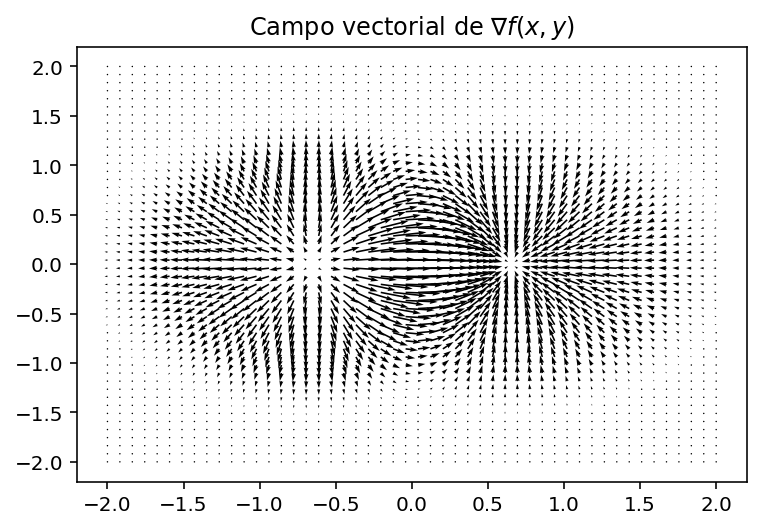

In [9]:
x,y = linspace(-2,2),linspace(-2,2)
x_mesh,y_mesh = meshgrid(x,y)
fx,fy = campo_campana_mod(x_mesh,y_mesh)
title(r'Campo vectorial de $\nabla f(x,y)}$')
quiver(x_mesh,y_mesh,fx,fy)
show()

Por otro lado, resulta mucho más ilustrativo utilizar las líneas de campo que son el resultado de hacer una integración del campo vectorial entre dos puntos. De esta manera se puede visualizar mejor el comportamiento del campo vectorial. Para ello podemos utilizar la función ```streamplot()``` como se muestra a continuación.

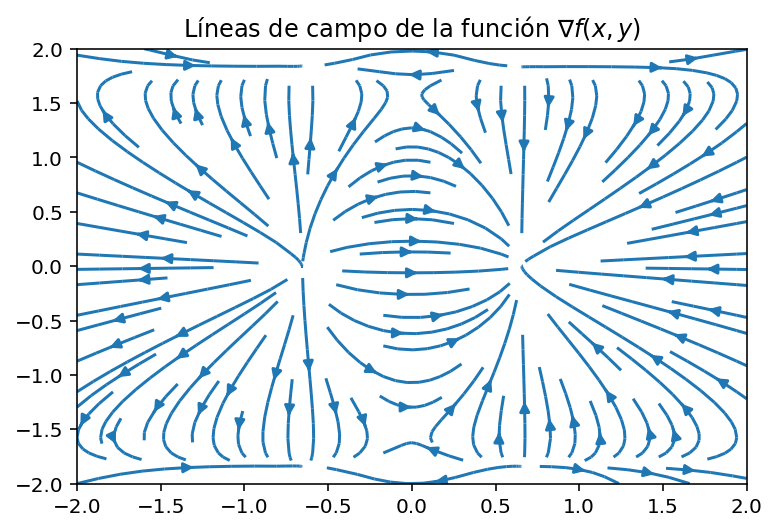

In [10]:
xlim([-2,2]),ylim([-2,2])
streamplot(x_mesh,y_mesh,fx,fy)
title(ur'Líneas de campo de la función $\nabla f(x,y)$')
show()

De esta manera si tenemos una función de potencial y su gradiente, podemos unir todas las funciones anteriores. Es decir, podemos dibujar la intensidad del potencial con colores, sus equipotenciales y líneas de campo como se muestra a continuación.

> Nota: En la siguiente celda de código se utilizan más puntos de evaluación con la finalidad de tener mayor resolución en el la imagen.

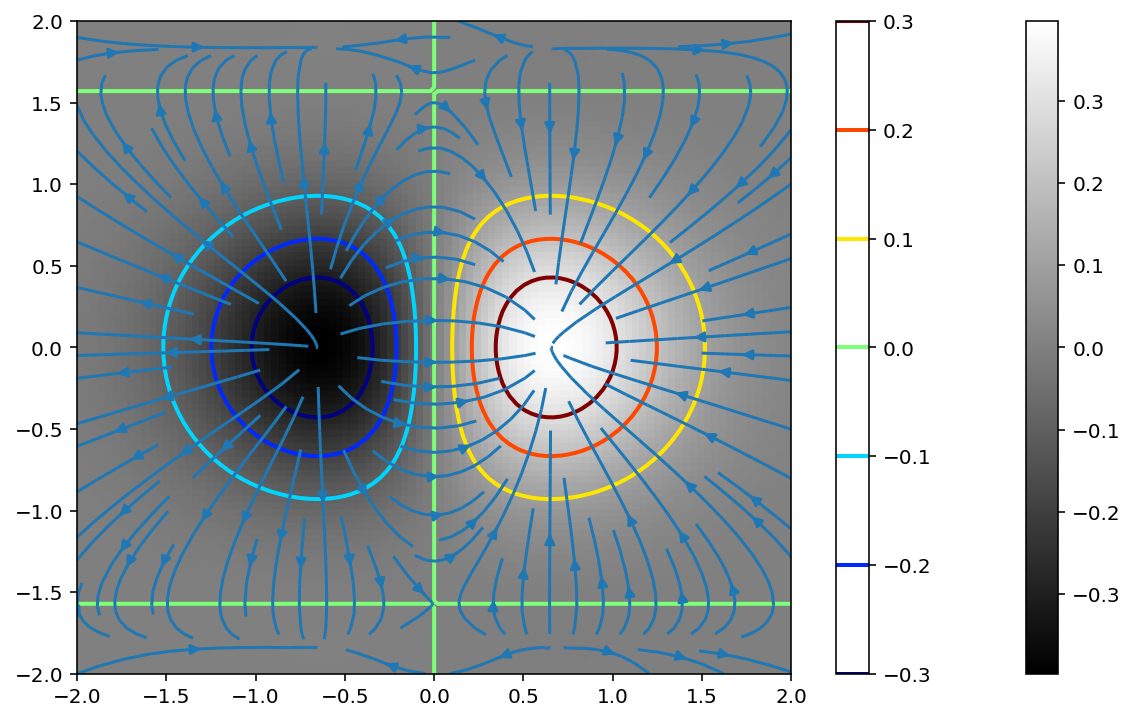

In [11]:
x,y = linspace(-2,2,100),linspace(-2,2,100)
x_mesh,y_mesh = meshgrid(x,y)
z = campana_mod(x_mesh,y_mesh)
fx,fy = campo_campana_mod(x_mesh,y_mesh)
figure(figsize=(10,6))
pcolor(x_mesh,y_mesh,z,cmap=cm.gray)
colorbar()
contour(x_mesh,y_mesh,z,cmap=cm.jet,linewidths=2)
colorbar()
streamplot(x_mesh,y_mesh,fx,fy)
xlim([-2,2]),ylim([-2,2])
show()

Sobre las graficas y funciones ```pcolor()```, ```quiver()```, ```contour()``` y ```streamplot()``` tienen diferentes argumentos que pueden hacer más estéticas las imágenes dependiendo del resultado que se quiera obtener. Se invita al lector a jugar con estas funciones para probar sus características.

# Librerías o bibliotecas propias


Finalmente, para terminar este *notebook* se verá la forma de hacer un módulo. Actualmente, hay dos maneras de hacer módulos, la primera consiste en hacer un archivo en texto plano con la extensión ```.py``` y la segunda manera es ocupar un notebook con extensión ```.ipynb```. En ambos casos, los archivos deben estar dentro del mismo directorio que el programa que los manda a llamar, o en su defecto se debe especificar la ruta del archivo. En el caso que se presenta más abajo, el módulo se encuentra dentro del mismo directorio que lo manda a llamar.

Para la primera forma de hacer un módulo es hacer un archivo en el que se puede utilizar cualquier editor de texto y dentro de este archivo se deben poner todas las funciones que se requieran. Es importante señalar que este archivo tiene que ser auto-consistente, es decir todo debe estar declarado dentro de este archivo con la finalidad de que no se generen errores de sintaxis. Todas las variables declaradas dentro de este archivo serán locales, es decir, sólo existen para las funciones dentro de archivo. Así mismo, dentro de este archivo se pueden llamar otras librerías, pero sólo estarán disponibles para las funciones que están dentro. Por ejemplo, supongamos que tenemos una función que se llama ```Saludar_desde_py()``` dentro del archivo *Saludo.py*. El contenido de archivo puede tener la siguiente estructura:

```python
# -*- coding: utf-8 -*-
def Saludar_desde_py3():
    print 'Hola, esta función vive en el archivo Saludo.py'
```

> La línea ```# -*- coding: utf-8 -*-``` es para especificar la codificación de todo el archivo, por lo que es importante que en los módulos que se generen se ponga el tipo de codificación para evitar errores de sintaxis.

Para importar las funciones de este módulo se hace exactamente de la misma manera a como se hace con las librerías estándar. En este caso vamos a importar todas las funciones contenidas en el archivo ```Saludo.py```:

In [12]:
from Saludo import *

Como se puede observar, la función ```Saludar_desde_py()``` no se ha declarado con anterioridad en el *notebook*, pero una vez que se ha importado con el código en la celda anterior, dicha función estará disponible. Para ejecutarla basta con llamarla como se muestra a continuación:

In [13]:
Saludar_desde_py()

Hola, esta función vive en el archivo Saludo.py


El proceso anterior genera un el sistema de archivos un archivo que se llama ```Saludo.pyc```, que es una versión binaria del archivo original, pero cuyo contenido es únicamente para ejecución en una computadora. Esto último es algo parecido a lo que se llama compilar un programa.

La segunda forma de hacer un módulo es un poco más moderna y es a partir de un *notebook*. Para ello basta con poner en este último las funciones que queremos importar. En este caso el archivo se llama ```Saludo.ipynb```. Para llamar el contenido de dicho archivo basta con utilizar el *magic command* ```%run 'modulo.ipynb'``` donde este último es el nombre del *notebook*. El contenido de dicho notebook es el siguiente:

```python
def Saludar_desde_ipynb():
    print 'Hola, esta función vive en el archivo Saludo.ipynb'
```

A continuación mostramos el funcionamiento de esta forma de importar bibliotecas:

In [14]:
%run 'Saludo.ipynb'

Con esto, las funciones contenidas en el notebook ```Saludo.ipynb``` estarán disponibles. En este caso llamaremos a la función ```Saludar_desde_ipynb()``` como se muestra a continuación:

In [15]:
Saludar_desde_ipynb()

Hola, esta función vive en el archivo Saludo.ipynb


Hasta el momento se han presentado los conocimientos básicos para manejar **IPython** bajo la plataforma de **Jupyter**. En la sección de [notebook's](http://sistemas.fciencias.unam.mx/~rich/Herramientas/index.html) se pueden encontrar más ejemplos representativos basados en problemas que se encuentran en temas científicos. Invitamos al usuario a que consulte los diferentes *notebook's* con la finalidad de mejorar sus habilidades de programación y de entendimiento en conocimientos científicos relacionados con Física, Matemáticas, Ciencias de la Tierra, Biología, Biomedicina, etc.

Regresar a las [herramientas](http://sistemas.fciencias.unam.mx/~rich/Herramientas/index.html)

Se agradece el apoyo de los proyectos DGAPA-PAPIME:

+ PE 112919 durante el año 2020. *Mantenimiento general, esta es la última actualización de este tutorial y se recomienda usar el correspondiente a Python 3*. Versión 3

+ PE 105017 durante el año 2017. *Versión 2*

+ PE 108216 durante el año 2016. *Mantenimiento mayor*

+ PE 106615 durante el año 2015. *Idea original*